# Numpy Version

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_csv_data = np.loadtxt("udemy_data/Audiobooks_data.csv", delimiter=',')
feature = raw_csv_data[:,1:-1] #take the data start from index 1 till the end of index -1
target = raw_csv_data[:,-1] #take the last index

## Balance the dataset
You can also handle this case by under-sampling or over-sampling the data

In [3]:
num_one_target = int(np.sum(target)) #the number of data with label 1 
zero_target_count = 0
index_to_remove = []

for i in range(target.shape[0]): #shep (rowsxcols), so we need to take the row number
    if target[i] == 0:
        zero_target_count += 1
        if zero_target_count > num_one_target: #if the number of 0 and 1 is equal, delete the remaining 0 data
            index_to_remove.append(i) #by append the index to this array
            
feature_balance = np.delete(feature, index_to_remove, axis=0) #remove the row data feature
target_balance = np.delete(target, index_to_remove, axis=0) #remove the target

## Standardize the input 
scale use to make the value of every feature not really different. Sometimes, I found the data with the value between 1-10 in feature A and 10000-1000000 in feature B. So we need to make the scale of feature A and B not realy different

In [8]:
from sklearn import preprocessing
scale_input = preprocessing.scale(feature_balance)

## Shuffle the data
we want to batching

In [9]:
shuffled_indices = np.arange(scale_input.shape[0]) #create array from 0 - len scale_input
np.random.shuffle(shuffled_indices)#random the value

shuffled_input = scale_input[shuffled_indices]
shuffled_target = target_balance[shuffled_indices]

## Split the data into train, validation, test
You can also use train_test_split using sklearn library. How to split the data ? let say we split data into train and test with test_size = 0.1. Then split the train data into train and validation with test_size = 0.1. This is equal with the methid below (below is manual method)

In [14]:
samples_count = shuffled_input.shape[0] #get the len

train_samples_count = int(0.8*samples_count)
validation_count = int(0.1*samples_count)
test_count = samples_count - train_samples_count - validation_count #the remaining data from train and validation

train_inputs = shuffled_input[:train_samples_count]
train_targets = shuffled_target[:train_samples_count]

validation_input = shuffled_input[train_samples_count: validation_count+train_samples_count]
validation_targets = shuffled_target[train_samples_count: validation_count+train_samples_count]

test_input = shuffled_input[train_samples_count+validation_count:]
test_target = shuffled_target[train_samples_count+validation_count:]

print(train_samples_count, validation_count, test_count)

3579 447 448


## Save the dataset to .npz format 

In [15]:
np.savez('Audiobooks_data_train', inputs=train_inputs, targets = train_targets)
np.savez('Audiobooks_data_validation', inputs=validation_input, targets = validation_targets)
np.savez('Audiobooks_data_test', inputs=test_input, targets = test_target)

## Load Data

In [3]:
#I have change the location for the data, so you can set your data location when doing np.load
npz_train = np.load("udemy_data/Audiobooks_data_train.npz")
train_inputs, train_targets = npz_train['inputs'].astype(np.float), npz_train['targets'].astype(np.int)

npz_val = np.load("udemy_data/Audiobooks_data_validation.npz")
val_inputs, val_targets = npz_val['inputs'].astype(np.float), npz_val['targets'].astype(np.int)

npz_test = np.load("udemy_data/Audiobooks_data_test.npz")
test_inputs, test_targets = npz_test['inputs'].astype(np.float), npz_test['targets'].astype(np.int)

## Model

In [4]:
input_size = 10 #there are 10 feature that we have
output_size = 2 #just 0 and 1
hidden_layer_size = 100 #enough for complex case

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size=100
epochs_size = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience=4)#early stopping method

model.fit(train_inputs, train_targets,
         batch_size = batch_size, 
         epochs = epochs_size,
         callbacks = [early_stopping],
         validation_data=(val_inputs, val_targets), verbose= 2)

Epoch 1/100
36/36 - 0s - loss: 0.5163 - accuracy: 0.7206 - val_loss: 0.4042 - val_accuracy: 0.7987
Epoch 2/100
36/36 - 0s - loss: 0.3865 - accuracy: 0.7882 - val_loss: 0.3660 - val_accuracy: 0.7987
Epoch 3/100
36/36 - 0s - loss: 0.3582 - accuracy: 0.8041 - val_loss: 0.3626 - val_accuracy: 0.8098
Epoch 4/100
36/36 - 0s - loss: 0.3535 - accuracy: 0.7946 - val_loss: 0.3436 - val_accuracy: 0.8166
Epoch 5/100
36/36 - 0s - loss: 0.3472 - accuracy: 0.8150 - val_loss: 0.3492 - val_accuracy: 0.8031
Epoch 6/100
36/36 - 0s - loss: 0.3461 - accuracy: 0.8086 - val_loss: 0.3389 - val_accuracy: 0.8054
Epoch 7/100
36/36 - 0s - loss: 0.3418 - accuracy: 0.8083 - val_loss: 0.3666 - val_accuracy: 0.8121
Epoch 8/100
36/36 - 0s - loss: 0.3358 - accuracy: 0.8089 - val_loss: 0.3572 - val_accuracy: 0.7919
Epoch 9/100
36/36 - 0s - loss: 0.3391 - accuracy: 0.8092 - val_loss: 0.3501 - val_accuracy: 0.8031
Epoch 10/100
36/36 - 0s - loss: 0.3287 - accuracy: 0.8259 - val_loss: 0.3403 - val_accuracy: 0.8054


## Testing

In [5]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

14/14 [==============================] - 0s 829us/step - loss: 0.3083 - accuracy: 0.8304


In [6]:
print("Test loss: {0:.2f} and Test accuracy: {1:.2f}% ".format(test_loss,test_accuracy*100))

Test loss: 0.31 and Test accuracy: 83.04% 


# Pandas Version

In [12]:
header_list = ["id", "book_length_overall", "book_length_avg","price_overall","prive_avg","review","review_scale","minutes_listened","completion","support_request","last_visit_minutes","target"]
df = pd.read_csv("udemy_data/Audiobooks_data.csv", names=header_list)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14084 entries, 0 to 14083
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   14084 non-null  int64  
 1   book_length_overall  14084 non-null  float64
 2   book_length_avg      14084 non-null  int64  
 3   price_overall        14084 non-null  float64
 4   prive_avg            14084 non-null  float64
 5   review               14084 non-null  int64  
 6   review_scale         14084 non-null  float64
 7   minutes_listened     14084 non-null  float64
 8   completion           14084 non-null  float64
 9   support_request      14084 non-null  int64  
 10  last_visit_minutes   14084 non-null  int64  
 11  target               14084 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 1.3 MB


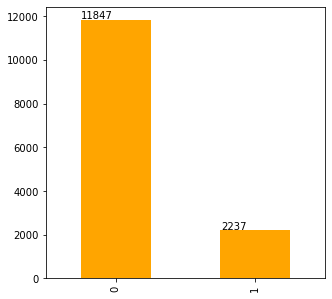

In [14]:
ax = df['target'].value_counts().plot(kind='bar', figsize=(5,5), color ='orange')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

## Balance the data 

In [15]:
from sklearn.utils import resample

fraud = df[df['target'] == 0]
not_fraud = df[df['target'] == 1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results


# combine majority and upsampled minority
df_balance = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
df_balance.target.value_counts()

1    2237
0    2237
Name: target, dtype: int64

## Shuffle Data

In [16]:
df_balance = df_balance.sample(frac=1) #shuffle

In [17]:
df_feature = df_balance.drop(['id','target'], axis=1) #get the feature and target
df_label = df_balance['target']

## Standardization

In [18]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df_feature)
df_feature_std = scaler.transform(df_feature)

header_list = ["book_length_overall", "book_length_avg","price_overall","prive_avg","review","review_scale","minutes_listened","completion","support_request","last_visit_minutes"]
df_feature_std = pd.DataFrame(data=df_feature_std,columns=header_list)

In [19]:
df_feature_std.head()

,book_length_overall,book_length_avg,price_overall,prive_avg,review,review_scale,minutes_listened,completion,support_request,last_visit_minutes
0,0.179810,3.595398,-0.363783,1.138733,-0.453437,0.007525,-0.391367,-0.382429,-0.186945,2.310627
1,1.197922,0.365864,0.179295,-0.076941,-0.453437,0.007525,-0.391367,-0.382429,-0.186945,0.774558
2,-0.438329,0.986928,0.013922,0.891348,2.205379,1.476595,-0.391367,-0.382429,5.888549,1.272158
3,0.107088,-0.255200,0.101713,-0.134614,-0.453437,0.007525,-0.391367,-0.382429,-0.186945,-0.761511
4,-0.765579,-0.752051,0.616208,0.247846,-0.453437,0.007525,-0.391367,-0.382429,1.838220,0.460854


##  Split to train, validation, test

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_remain, y_train, y_remain = train_test_split(df_feature_std, df_label, test_size=0.2)
X_validation, X_test, y_validation, y_test = train_test_split(X_remain, y_remain, test_size=0.5)

In [21]:
print(X_train.shape, X_validation.shape, X_test.shape)

(3579, 10) (447, 10) (448, 10)


## Save data to .np format 

In [152]:
np.savez('Audiobooks_pandas_train', inputs=X_train, targets = y_train)
np.savez('Audiobooks_pandas_validation', inputs=X_validation, targets = y_validation)
np.savez('Audiobooks_pandas_test', inputs=X_test, targets = y_test)

## Load Data

In [13]:
npz_train = np.load("udemy_data/Audiobooks_pandas_train.npz")
train_inputs, train_targets = npz_train['inputs'].astype(np.float), npz_train['targets'].astype(np.int)

npz_val = np.load("udemy_data/Audiobooks_pandas_validation.npz")
val_inputs, val_targets = npz_val['inputs'].astype(np.float), npz_val['targets'].astype(np.int)

npz_test = np.load("udemy_data/Audiobooks_pandas_test.npz")
test_inputs, test_targets = npz_test['inputs'].astype(np.float), npz_test['targets'].astype(np.int)

## Model

In [14]:
input_size = 10 #there are 10 feature that we have
output_size = 2 #just 0 and 1
hidden_layer_size = 100 #enough for complex case

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

batch_size=100
epochs_size = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience=4)#early stopping method

model.fit(train_inputs, train_targets,
         batch_size = batch_size, 
         epochs = epochs_size,
         callbacks = [early_stopping],
         validation_data=(val_inputs, val_targets), verbose= 2)

Epoch 1/100
36/36 - 0s - loss: 0.5245 - accuracy: 0.7259 - val_loss: 0.3956 - val_accuracy: 0.8121
Epoch 2/100
36/36 - 0s - loss: 0.4060 - accuracy: 0.7860 - val_loss: 0.3590 - val_accuracy: 0.8210
Epoch 3/100
36/36 - 0s - loss: 0.3876 - accuracy: 0.7935 - val_loss: 0.3538 - val_accuracy: 0.8210
Epoch 4/100
36/36 - 0s - loss: 0.3785 - accuracy: 0.8005 - val_loss: 0.3573 - val_accuracy: 0.8076
Epoch 5/100
36/36 - 0s - loss: 0.3683 - accuracy: 0.8061 - val_loss: 0.3350 - val_accuracy: 0.8277
Epoch 6/100
36/36 - 0s - loss: 0.3719 - accuracy: 0.8041 - val_loss: 0.3396 - val_accuracy: 0.8210
Epoch 7/100
36/36 - 0s - loss: 0.3666 - accuracy: 0.7983 - val_loss: 0.3207 - val_accuracy: 0.8255
Epoch 8/100
36/36 - 0s - loss: 0.3755 - accuracy: 0.7997 - val_loss: 0.3340 - val_accuracy: 0.8255
Epoch 9/100
36/36 - 0s - loss: 0.3689 - accuracy: 0.8053 - val_loss: 0.3313 - val_accuracy: 0.8345
Epoch 10/100
36/36 - 0s - loss: 0.3677 - accuracy: 0.8053 - val_loss: 0.3232 - val_accuracy: 0.8434
Epoch 11/

## Test Model

In [15]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

14/14 [==============================] - 0s 992us/step - loss: 0.3740 - accuracy: 0.7924


In [16]:
print("Test loss: {0:.2f} and Test accuracy: {1:.2f}% ".format(test_loss,test_accuracy*100))

Test loss: 0.37 and Test accuracy: 79.24% 


## ========== Using Sklearn 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
params = {'min_samples_leaf':[1,2,3],
          'min_samples_split':[2,3,4,5],
          'min_weight_fraction_leaf':[0.0,0.04,0.07],
          'n_estimators':[115,125,135],
          'criterion':['gini','entropy'],
          'class_weight':['None','balanced'],
          'max_features':['auto', 'sqrt', 'log2']}
model = RandomForestClassifier()
gsc = GridSearchCV(model, params, scoring='roc_auc', cv=5, return_train_score=True, n_jobs = 10) 

In [24]:
gsc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'class_weight': ['None', 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.0, 0.04, 0.07],
                         'n_estimators': [115, 125, 135]},
             return_train_score=True, scoring='roc_auc')

In [25]:
print(gsc.best_params_)
print(gsc.best_score_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 125}
0.9170593401993612


In [27]:
model = RandomForestClassifier(class_weight = 'balanced',
                               criterion = 'gini', 
                               max_features = 'auto',
                               min_samples_leaf = 3, 
                               min_samples_split = 2, 
                               min_weight_fraction_leaf = 0.0, 
                               n_estimators = 125)

In [28]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=3,
                       n_estimators=125)

In [31]:
model.score(X_train, y_train)

0.8714724783459067

In [35]:
#validation test
from sklearn.metrics import accuracy_score
valid_pred = model.predict(X_validation)
accuracy_score(valid_pred, y_validation)

0.8098434004474273

In [36]:
test_pred = model.predict(X_test)
accuracy_score(test_pred, y_test)

0.7834821428571429

## Alphabet hackerank

In [70]:
alphabet = ['a','b','c','d','e','f','g','h','i','j']
number = int(input("Input number: "))
dash = number
sentences = []
for line in range(number):
    sentence = ""
    #first dash
    for dash_word in range((dash-1)*2):
        sentence += "-"
    
    #letter
    letter = alphabet[dash-1:number]
    for i in range(len(letter),0,-1):
        sentence += letter[i-1]
        if i != 1:
            sentence += "-"
    if len(letter) != 1:
        sentence += "-"
    for i in range(1,len(letter)):
        sentence += letter[i]
        if i != len(letter)-1:
            sentence += "-"
        
    #second dash
    for dash_word in range((dash-1)*2):
        sentence += "-"
    dash = dash - 1
    sentences.append(sentence)
    
#load data
for i in sentences:
    print(i)
    
for i in range(len(sentences)-2,-1,-1):
    print(sentences[i])

Input number: 7
------------g------------
----------g-f-g----------
--------g-f-e-f-g--------
------g-f-e-d-e-f-g------
----g-f-e-d-c-d-e-f-g----
--g-f-e-d-c-b-c-d-e-f-g--
g-f-e-d-c-b-a-b-c-d-e-f-g
--g-f-e-d-c-b-c-d-e-f-g--
----g-f-e-d-c-d-e-f-g----
------g-f-e-d-e-f-g------
--------g-f-e-f-g--------
----------g-f-g----------
------------g------------
